CLASE BLOQUE - BLOCKCHAIN

APARTADO 1.1

In [1]:
import hashlib
import json
import time

In [33]:
class Block():
    def __init__(self, index, transactions, timestamp, previous_hash):
        """
        Constructor for the class Block
        index --> unique ID number for the block
        transaction --> LIST of transaction
        timestamp --> creation time of the Block
        previous_hash --> hash value of the previous Block

        """
        self.index = index
        self.transactions = transactions
        self.timestamp = timestamp
        self.previous_hash = previous_hash
        
    
    def compute_hash(self):
        """
        calculate hash --> hash sobre toda la información del bloque
        """
        # creamos un json del bloque 
        block_string = json.dumps(self.__dict__, sort_keys = True)
        
        # creamos hash del json creado
        hashed_block_string = hashlib.sha256(block_string.encode('utf-8')).hexdigest()
        
        return hashed_block_string 


In [4]:
bloque = Block(1,2,3,4)
bloque.compute_hash()

'268b3626a44ab7a87f2f0c7ee6e95c30b4ab1755fa96a2508125259340a9e339'

APARTADO 1.2 

In [248]:
class Blockchain():
    def __init__(self, difficulty=2):
        """
        difficulty --> para que solo ponga dos ceros en el hash
        """
        self.unconfirmed_transactions = []
        self.chain = []
        self.create_genesis_block()
        self.difficulty = difficulty
        
    def create_genesis_block(self):
        genesis_block = Block(0, [], time.time(), "0")
        genesis_block.current_hash = genesis_block.compute_hash()
        self.chain.append(genesis_block)
    
    def proof_of_work(self, bloque_nuevo):
        bloque_nuevo.nonce = 0 # añadimos atributo nonce
        while(True):
            hash_del_bloque = bloque_nuevo.compute_hash()
            first_caracters = hash_del_bloque[0 : (self.difficulty)]

            if first_caracters != "0"*self.difficulty:
                bloque_nuevo.nonce += 1
            else:
                break
        return hash_del_bloque
    
    def is_valid_proof(self, nuevo_hash, bloque):
        # hash del bloque = nuevo_hash
        if bloque.compute_hash() == nuevo_hash:
            hash_del_bloque = nuevo_hash
            first_caracters = hash_del_bloque[0 : (self.difficulty)]
            if first_caracters == "0"*self.difficulty: 
                print("correcto")
                return True
            else:
                print("EL NUEVO HASH: ", nuevo_hash)
                return False
        else:
            return False
    
    def append_block(self, nuevo_hash, bloque):
        if bloque.previous_hash == self.last_block.current_hash:
            if self.is_valid_proof(nuevo_hash, bloque):
                bloque.current_hash = nuevo_hash
                self.chain.append(bloque)
                return True
            else:
                return False
        else:
            return False
    
    def add_new_transaction(self, transaction):
        self.unconfirmed_transactions.append(transaction)
            
    @property
    def last_block(self):
        return self.chain[-1]
    
    # validar bloque con transaccion sin confirmar
    def mine(self):
        if len(self.unconfirmed_transactions) == 0:
            return False
        else:
            new_block = Block(index = self.last_block.index + 1, transactions = self.unconfirmed_transactions, timestamp = time.time(), previous_hash = self.last_block.current_hash)
            new_hash = self.proof_of_work(new_block)
            if self.append_block(new_hash, new_block):
                self.unconfirmed_transactions = []
                return new_block.index
            else:
                return False
    
    def check_chain(self, blockchain):
        cont = 0
        for block in blockchain:
            print(cont)
            if cont != 0:
                current_hash_check = block.current_hash
                print("CURRENT HASH CHECK")
                print(current_hash_check)
                delattr(block, "current_hash")

                if self.is_valid_proof(current_hash_check, block):
                    print(block.previous_hash)
                    print(self.last_block.current_hash)
                    if block.previous_hash == self.last_block.current_hash:
                        block.current_hash = current_hash_check
                        return True
                    else:
                        print("Preivuous hash")
                        False
                else:
                    print("is valid")
                    False
            cont = cont +1

In [116]:
blockchain = Blockchain()
blockchain.last_block.__dict__

{'index': 0,
 'transactions': [],
 'timestamp': 1650877849.9347575,
 'previous_hash': '0',
 'current_hash': '02005acadd7470d72daf1c91ef5045a6f4083cef77d2224b95c552b706d5c4a6'}

APARTADO 1.3

In [117]:
blockchain = Blockchain(2)
blockchain.last_block.__dict__

new_index = blockchain.last_block.index+1
new_transaction = []
new_timestamp = time.time()
new_previous_hash = blockchain.last_block.current_hash
new_block = Block(new_index, new_transaction, new_timestamp, new_previous_hash)
new_block.__dict__

{'index': 1,
 'transactions': [],
 'timestamp': 1650877880.7394998,
 'previous_hash': '2c9b8c43efde1279974c9377e5780d10b8672a0f10226312a8f667801838d475'}

In [121]:
blockchain.proof_of_work(new_block)

'00eaf3275e251027fd2ebf8a89317588be41ed0956d3ac7cbaddd657f740bc59'

In [122]:
new_block.nonce

131

FUNCIÓN PARA MEDIR TIEMPOS

0.0
0.0
0.004029273986816406
0.057181358337402344
0.35689616203308105
6.8410820960998535


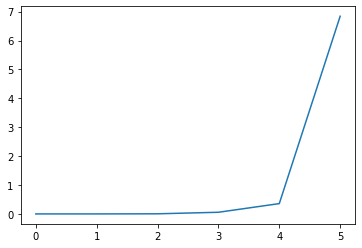

In [72]:
import matplotlib.pyplot as plt

vector_tiempo = []
vector_nonce = []

for k in range(6):
    blockchain = Blockchain(k)
    blockchain.last_block.__dict__

    new_index = blockchain.last_block.index+1
    new_transaction = []
    new_timestamp = time.time()
    new_previous_hash = blockchain.last_block.current_hash
    new_block = Block(new_index, new_transaction, new_timestamp, new_previous_hash)
    new_block.__dict__
    
    inicio = time.time()
    
    blockchain.proof_of_work(new_block)
    
    final = time.time()
    tiempo = final-inicio
    print(tiempo)
    
    vector_tiempo.append(tiempo)
    vector_nonce.append(new_block.nonce)

plt.plot(range(6), vector_tiempo)


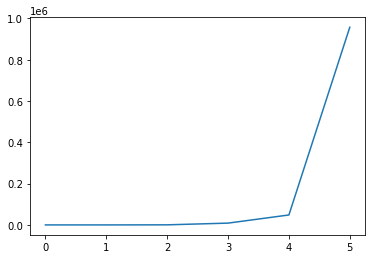

In [73]:
plt.plot(range(6), vector_nonce)

APARTADO 1.4

In [206]:
blockchain = Blockchain()
blockchain.last_block.__dict__

{'index': 0,
 'transactions': [],
 'timestamp': 1650879371.6492438,
 'previous_hash': '0',
 'current_hash': '6fe11fceb532f12495c8cde09e66780ec8bf1f64c1d12c22323e44f073c98251'}

In [207]:
print("Length of Blockchain: ", len(blockchain.chain))

Length of Blockchain:  1


In [208]:
new_index = blockchain.last_block.index+1
new_transaction = []
new_timestamp = time.time()
new_previous_hash = blockchain.last_block.current_hash
newblock = Block(new_index, new_transaction, new_timestamp, new_previous_hash)
newblock.__dict__

{'index': 1,
 'transactions': [],
 'timestamp': 1650879372.9741673,
 'previous_hash': '6fe11fceb532f12495c8cde09e66780ec8bf1f64c1d12c22323e44f073c98251'}

In [209]:
new_hash = blockchain.proof_of_work(newblock)
print(newblock.__dict__)
print("Hash of newblock: ", new_hash)

{'index': 1, 'transactions': [], 'timestamp': 1650879372.9741673, 'previous_hash': '6fe11fceb532f12495c8cde09e66780ec8bf1f64c1d12c22323e44f073c98251', 'nonce': 22}
Hash of newblock:  00e278bec25fa41466ef746f1ea7d7c636eeeb9f224cc5439b5a155ab2c8a22b


In [210]:
out = blockchain.append_block(new_hash, newblock)
print("Appended: ", out)
blockchain.last_block.__dict__

6fe11fceb532f12495c8cde09e66780ec8bf1f64c1d12c22323e44f073c98251
6fe11fceb532f12495c8cde09e66780ec8bf1f64c1d12c22323e44f073c98251
Appended:  True


{'index': 1,
 'transactions': [],
 'timestamp': 1650879372.9741673,
 'previous_hash': '6fe11fceb532f12495c8cde09e66780ec8bf1f64c1d12c22323e44f073c98251',
 'nonce': 22,
 'current_hash': '00e278bec25fa41466ef746f1ea7d7c636eeeb9f224cc5439b5a155ab2c8a22b'}

In [211]:
blockchain.add_new_transaction("data1")
blockchain.add_new_transaction("data2")
blockchain.add_new_transaction("data3")

In [212]:
blockchain.unconfirmed_transactions

['data1', 'data2', 'data3']

In [213]:
new_index = blockchain.mine()
print(new_index)

00e278bec25fa41466ef746f1ea7d7c636eeeb9f224cc5439b5a155ab2c8a22b
00e278bec25fa41466ef746f1ea7d7c636eeeb9f224cc5439b5a155ab2c8a22b
2


APARTADO 1.5

In [243]:
blockchain = Blockchain()

new_index = blockchain.last_block.index+1
new_transaction = []
new_timestamp = time.time()
new_previous_hash = blockchain.last_block.current_hash
newblock = Block(new_index, new_transaction, new_timestamp, new_previous_hash)

new_hash = blockchain.proof_of_work(newblock)

out = blockchain.append_block(new_hash, newblock)

blockchain.add_new_transaction("data1")
blockchain.add_new_transaction("data2")
blockchain.add_new_transaction("data3")

new_index = blockchain.mine()

chain_to_check = blockchain.chain
blockchain.check_chain(chain_to_check)

correcto
correcto
0
1
correcto
47ef2c2d68a470e9a0fa446392d649a46049dabfcad717bec39f3b17ffacae40
003a80042a2c46d88cbab58fe4eeadfe973c73938e93e73ce98609c163429ac5
Preivuous hash
2
correcto
00ef797f96d903cb0b2f6051f925e2b7fafa1d62ef4b0b76eb9f89a48aaf3235


AttributeError: 'Block' object has no attribute 'current_hash'

In [249]:
blockchain = Blockchain()

new_index = blockchain.last_block.index+1
new_transaction = []
new_timestamp = time.time()
new_previous_hash = blockchain.last_block.current_hash
newblock = Block(new_index, new_transaction, new_timestamp, new_previous_hash)

new_hash = blockchain.proof_of_work(newblock)

out = blockchain.append_block(new_hash, newblock)

blockchain.add_new_transaction("data1")
blockchain.add_new_transaction("data2")
blockchain.add_new_transaction("data3")

new_index = blockchain.mine()

correcto
correcto


In [250]:
blockchain.chain[1].__dict__

{'index': 1,
 'transactions': [],
 'timestamp': 1650880938.502445,
 'previous_hash': '8cced870dbafaca9442ceaee31bc036efd09d6b5edd5d58e0ead454adfa58531',
 'nonce': 3,
 'current_hash': '00b4a294cb98e5dcd40598653290e1c95ca1d9262754610af93e1bfaf26e2648'}

In [251]:
blockchain.chain[2].__dict__

{'index': 2,
 'transactions': ['data1', 'data2', 'data3'],
 'timestamp': 1650880938.502445,
 'previous_hash': '00b4a294cb98e5dcd40598653290e1c95ca1d9262754610af93e1bfaf26e2648',
 'nonce': 70,
 'current_hash': '002d89fe3c760e4395982a6a70d76ec3e48514ae8b2f22566fdb014d26bfd1d6'}

In [252]:
chain_to_check = blockchain.chain
blockchain.check_chain(chain_to_check)

0
1
CURRENT HASH CHECK
00b4a294cb98e5dcd40598653290e1c95ca1d9262754610af93e1bfaf26e2648
correcto
8cced870dbafaca9442ceaee31bc036efd09d6b5edd5d58e0ead454adfa58531
002d89fe3c760e4395982a6a70d76ec3e48514ae8b2f22566fdb014d26bfd1d6
Preivuous hash
2
CURRENT HASH CHECK
002d89fe3c760e4395982a6a70d76ec3e48514ae8b2f22566fdb014d26bfd1d6
correcto
00b4a294cb98e5dcd40598653290e1c95ca1d9262754610af93e1bfaf26e2648


AttributeError: 'Block' object has no attribute 'current_hash'